In [162]:
from importlib import reload
import numpy as np
pi=np.pi
#
import matplotlib.pyplot as plt
import matplotlib as mpl

from functools import partial
import copy

In [163]:
import phasr as phr

In [164]:
phr.__version__

'0.3.1.dev0+gea06a1e.d20250207'

# Kinematik of the experiments

In [7]:
#Pb: 
q_Pb = np.sqrt(0.00616*1e6)
theta_Pb = 4.7*pi/180 #L: 4.71(2) R: 4.67(2)
print(q_Pb)
#Ca: 
q_Ca = np.sqrt(0.0297*1e6)
theta_Ca = 4.51*pi/180
print(q_Ca)
#Al:
q_Al = np.sqrt(0.02357*1e6)
theta_Al = 7.61*pi/180
print(q_Al)

78.48566748139433
172.33687939614086
153.52524222420234


In [8]:
#Pb:
#approx
print(q_Pb/(2*np.sin(theta_Pb/2)))
#approx
#Ca: 
#approx
print(q_Ca/(2*np.sin(theta_Ca/2)))
#Al:
#approx
print(q_Al/(2*np.sin(theta_Al/2)))

957.0550135868299
2189.961300796471
1156.7434233585843


# Horowitz

In [165]:
def weak_density_model(r,lam,nucleus): return (nucleus.Qw/nucleus.Z)*lam**3*nucleus.charge_density(lam*r)

## Pb208

In [166]:
Pb208_test1 = phr.nucleus('Pb208_test_100',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_test1)
Pb208_test1.update_dependencies()
Pb208_test1.fill_gaps()
Pb208_test2 = phr.nucleus('Pb208_test_095',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test2.weak_density = partial(weak_density_model,lam=0.9502,nucleus=Pb208_test2)
Pb208_test2.update_dependencies()
Pb208_test2.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_100fermi3p_x=0.0-1000.0-1.0.txt
data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_095fermi3p_x=0.0-1000.0-1.0.txt


### TestPlots

In [26]:
Pb208_c=phr.nucleus('Phb208_c',A=208,Z=82)

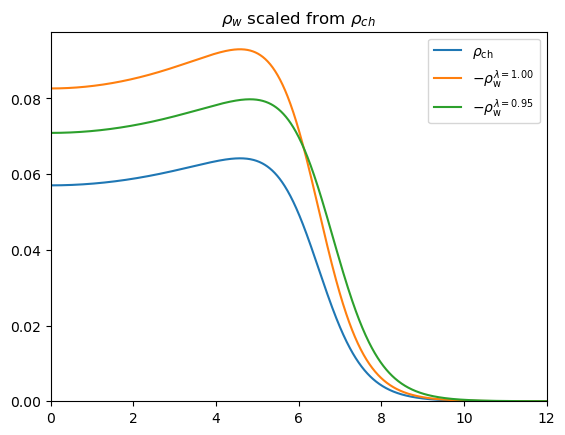

In [28]:
r=np.arange(0,12,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,Pb208_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-Pb208_test1.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=1.00}$')
plt.plot(r,-Pb208_test2.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=0.95}$')
plt.xlim(0,12)
plt.ylim(0,)
plt.legend()

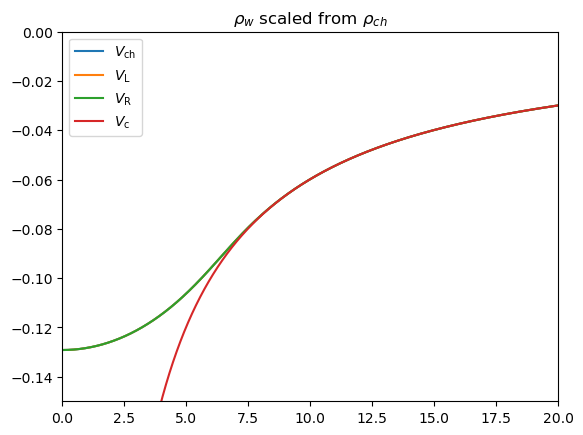

In [29]:
r=np.arange(0,20,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,Pb208_test1.electric_potential(r),label=r'$V_\operatorname{ch}$')
plt.plot(r,Pb208_test1.electric_potential(r)-Pb208_test1.weak_potential(r),label=r'$V_\operatorname{L}$')
plt.plot(r,Pb208_test1.electric_potential(r)+Pb208_test1.weak_potential(r),label=r'$V_\operatorname{R}$')
plt.plot(r[r>0],Pb208_c.electric_potential(r[r>0]),label=r'$V_\operatorname{c}$')
plt.xlim(0,20)
plt.ylim(-0.15,0)
plt.legend()

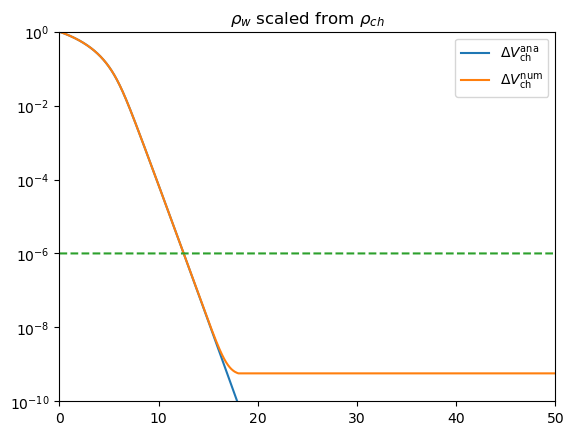

In [30]:
r=np.arange(1e-2,50,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,np.abs((Pb208_test1.electric_potential_ana(r)-Pb208_c.electric_potential(r))/Pb208_c.electric_potential(r)),label=r'$\Delta V^\operatorname{ana}_\operatorname{ch}$')
plt.plot(r,np.abs((Pb208_test1.electric_potential(r)-Pb208_c.electric_potential(r))/Pb208_c.electric_potential(r)),label=r'$\Delta V^\operatorname{num}_\operatorname{ch}$')
plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,50)
plt.ylim(1e-10,1)
plt.yscale('log')
plt.legend()

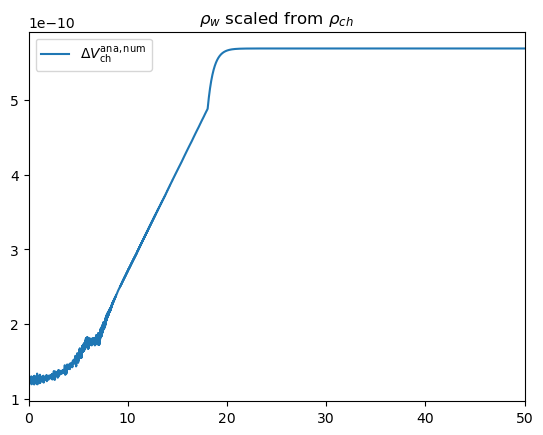

In [31]:
r=np.arange(1e-2,50,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,(Pb208_test1.electric_potential_ana(r)-Pb208_test1.electric_potential(r))/Pb208_test1.electric_potential(r),label=r'$\Delta V^\operatorname{ana,num}_\operatorname{ch}$')
#plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,50)
#plt.ylim(1e-10,1)
#plt.yscale('log')
plt.legend()

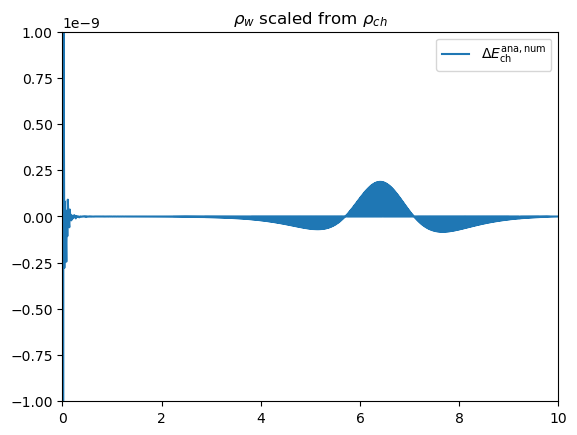

In [32]:
r=np.arange(1e-2,10,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,(Pb208_test1.electric_field_ana(r)-Pb208_test1.electric_field(r))/Pb208_test1.electric_field(r),label=r'$\Delta E^\operatorname{ana,num}_\operatorname{ch}$')
#plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,10)
plt.ylim(-1e-9,1e-9)
#plt.yscale('log')
plt.legend()

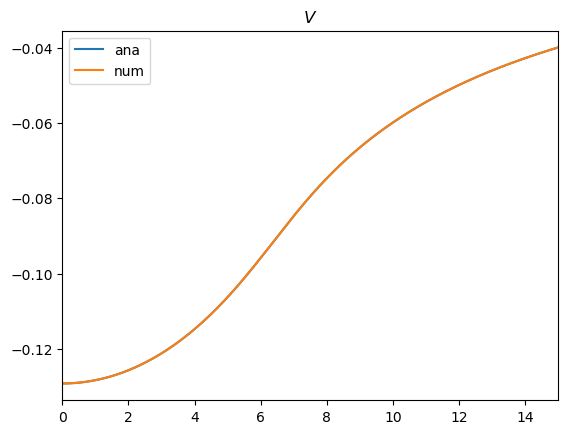

In [33]:
r=np.arange(0,15,1e-2)
plt.title(r'$V$')
plt.plot(r,Pb208_test1.electric_potential_ana(r),label=r'ana')
plt.plot(r,Pb208_test1.electric_potential(r),label=r'num')
plt.xlim(0,15)
#plt.ylim(-0.13,-0.12)
plt.legend()

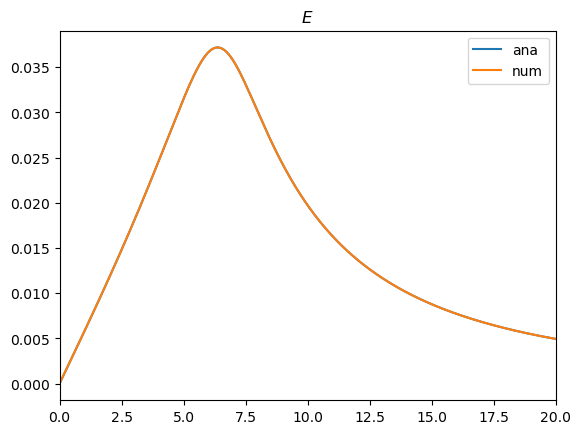

In [34]:
r=np.arange(1e-3,20,1e-2)
plt.title(r'$E$')
plt.plot(r,Pb208_test1.electric_field_ana(r),label=r'ana')
plt.plot(r,Pb208_test1.electric_field(r),label=r'num')
plt.xlim(0,20)
#plt.ylim(0,)
plt.legend()

In [35]:
print(Pb208_test1.Vmin)
print(Pb208_test1.Vmin_ana)

-0.1291961769648503
-0.1291961769809547


## He4

In [167]:
He4_test1 = phr.nucleus('He4_test_100',Z=2,A=4,c=1.008,z=0.327,w=0.445)
He4_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=He4_test1)
He4_test1.update_dependencies()
He4_test1.fill_gaps()
He4_test2 = phr.nucleus('He4_test_095',Z=2,A=4,c=1.008,z=0.327,w=0.445)
He4_test2.weak_density = partial(weak_density_model,lam=1./0.99,nucleus=He4_test2) # unclear what value for lambda
He4_test2.update_dependencies()
He4_test2.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_He4_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_He4_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_He4_test_100fermi3p_x=0.0-1000.0-1.0.txt
data loaded from  ./tmp/nucleus_splines/electric_field_He4_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_He4_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_He4_test_095fermi3p_x=0.0-1000.0-1.0.txt


### Test Plots

In [36]:
He4_c = phr.nucleus('He4_c',Z=2,A=4)

In [38]:
He4_test2.weak_radius/He4_test2.charge_radius

0.99

In [39]:
He4_test2.charge_radius

1.7168331457341202

In [40]:
He4_test2.weak_radius

1.699664814276779

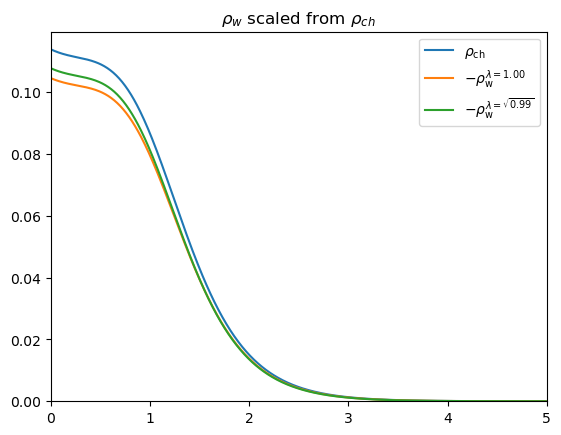

In [41]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,He4_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,-He4_test1.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=1.00}$')
plt.plot(r,-He4_test2.weak_density(r),label=r'$-\rho_\operatorname{w}^{\lambda=\sqrt{0.99}}$')
plt.xlim(0,5)
plt.ylim(0,)
plt.legend()

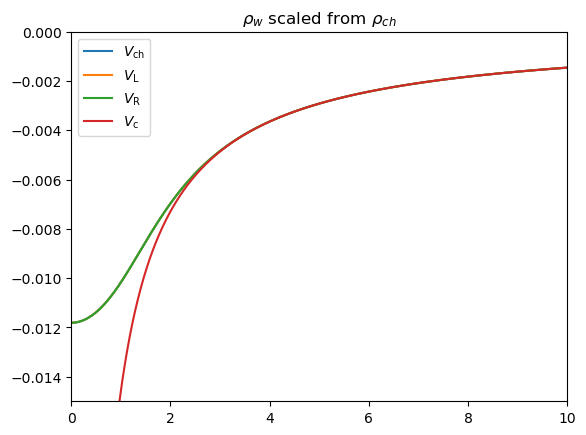

In [42]:
r=np.arange(0,10,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,He4_test1.electric_potential(r),label=r'$V_\operatorname{ch}$')
plt.plot(r,He4_test1.electric_potential(r)-He4_test1.weak_potential(r),label=r'$V_\operatorname{L}$')
plt.plot(r,He4_test1.electric_potential(r)+He4_test1.weak_potential(r),label=r'$V_\operatorname{R}$')
plt.plot(r[r>0],He4_c.electric_potential(r[r>0]),label=r'$V_\operatorname{c}$')
plt.xlim(0,10)
plt.ylim(-0.015,0)
plt.legend()

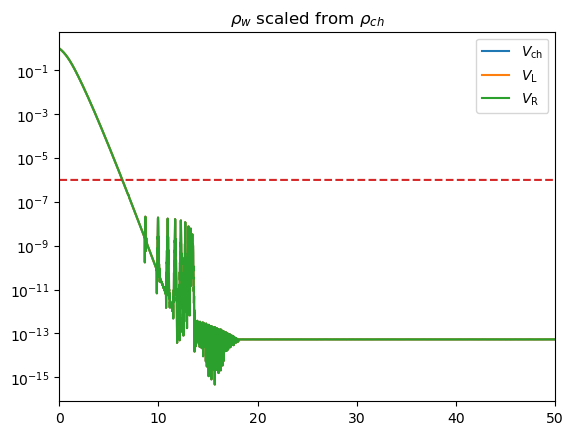

In [43]:
r=np.arange(1e-2,50,1e-2)
plt.title(r'$\rho_w$ scaled from $\rho_{ch}$')
plt.plot(r,np.abs((He4_test1.electric_potential(r)-He4_c.electric_potential(r))/He4_c.electric_potential(r)),label=r'$V_\operatorname{ch}$')
plt.plot(r,np.abs((He4_test1.electric_potential(r)-He4_test1.weak_potential(r)-He4_c.electric_potential(r))/He4_c.electric_potential(r)),label=r'$V_\operatorname{L}$')
plt.plot(r,np.abs((He4_test1.electric_potential(r)+He4_test1.weak_potential(r)-He4_c.electric_potential(r))/He4_c.electric_potential(r)),label=r'$V_\operatorname{R}$')
plt.plot(r,r*0+1e-6,linestyle='--')
plt.xlim(0,50)
#plt.ylim(1e-12,1)
plt.yscale('log')
plt.legend()

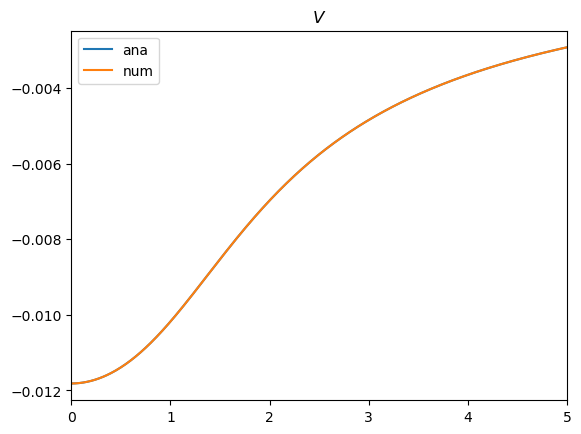

In [44]:
r=np.arange(0,5,1e-2)
plt.title(r'$V$')
plt.plot(r,He4_test1.electric_potential_ana(r),label=r'ana')
plt.plot(r,He4_test1.electric_potential(r),label=r'num')
plt.xlim(0,5)
#plt.ylim(-0.13,-0.12)
plt.legend()

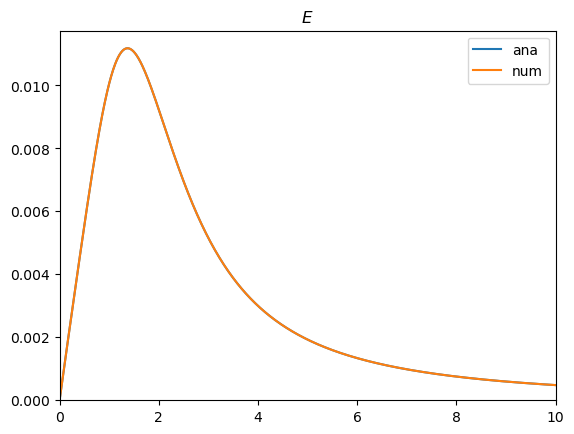

In [45]:
r=np.arange(1e-3,10,1e-2)
plt.title(r'$E$')
plt.plot(r,He4_test1.electric_field_ana(r),label=r'ana')
plt.plot(r,He4_test1.electric_field(r),label=r'num')
plt.xlim(0,10)
plt.ylim(0,)
plt.legend()

In [46]:
print(He4_test1.Vmin)
print(He4_test1.Vmin_ana)

-0.01181459414191814
-0.011814594146245952


# A_PV (compare Horowitz 1998)

## Pb208

### Optimise settings

In [168]:
Pb208_ref_test = phr.nuclei.references.load_reference_nucleus(82,208)[0]
Pb208_ref_test.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_ref_test)
Pb208_ref_test.update_dependencies()

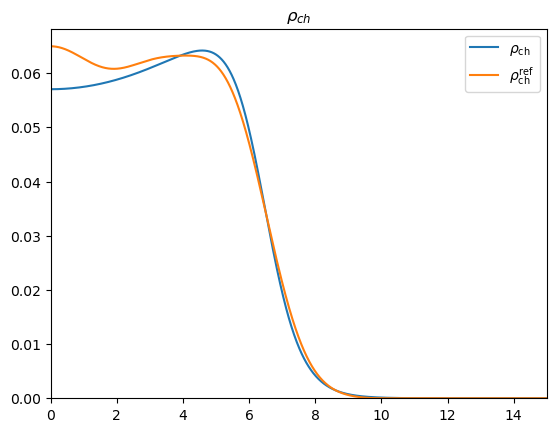

In [169]:
r=np.arange(0,15,1e-2)
plt.title(r'$\rho_{ch}$')
plt.plot(r,Pb208_test1.charge_density(r),label=r'$\rho_\operatorname{ch}$')
plt.plot(r,Pb208_ref_test.charge_density(r),label=r'$\rho^\operatorname{ref}_\operatorname{ch}$')
plt.xlim(0,15)
plt.ylim(0,)
plt.legend()

In [170]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_ref_test = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_ref_test,verbose=True)

Calculate left crosssection ...
E= 846.2705639962488 MeV
r0= 0.0107 fm
rc= 11.3 fm
Calculate phaseshift for kappa= -1 , delta_diff=  1.0457583594308733
Calculate phaseshift for kappa= -2 , delta_diff=  -1.4129871261909135
Calculate phaseshift for kappa= -3 , delta_diff=  -1.1064016064271351
Calculate phaseshift for kappa= -4 , delta_diff=  -0.9077638959796959
Calculate phaseshift for kappa= -5 , delta_diff=  -0.7616639869275881
Calculate phaseshift for kappa= -6 , delta_diff=  -0.647012464185658
Calculate phaseshift for kappa= -7 , delta_diff=  -0.5534883914803239
Calculate phaseshift for kappa= -8 , delta_diff=  -0.4752579151033225
Calculate phaseshift for kappa= -9 , delta_diff=  -0.40869560319947595
Calculate phaseshift for kappa= -10 , delta_diff=  -0.35139057370232063
Calculate phaseshift for kappa= -11 , delta_diff=  -0.3016551695539169
Calculate phaseshift for kappa= -12 , delta_diff=  -0.2582587454188616
Calculate phaseshift for kappa= -13 , delta_diff=  -0.22027303444153912
Ca

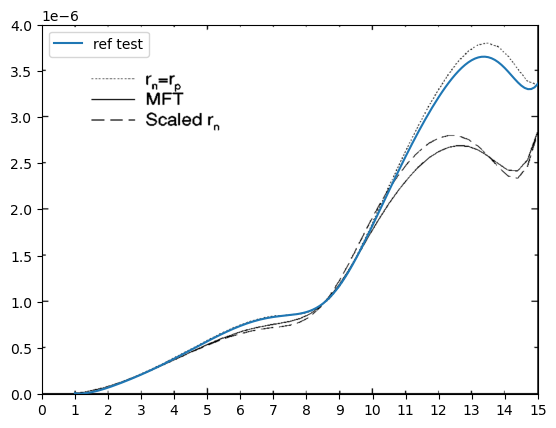

In [171]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15,0, 4e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

In [90]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
args_APV_Pb208=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,Pb208_ref_test,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 138.75427103042603 diff: -0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-15}
time: 133.0844202041626 diff: -0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 115.41543388366699 diff: 2.4072678779659124e-06
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 113.48159074783325 diff: 2.3571164906097033e-05
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 98.2235918045044 diff: 6.870743782303635e-06
new best: {'method': 'DOP853', 'N_partial_

In [94]:
args_APV_Pb208={'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-09}

In [95]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
A_PV_ref_test_opt = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_ref_test,verbose=False,**args_APV_Pb208)

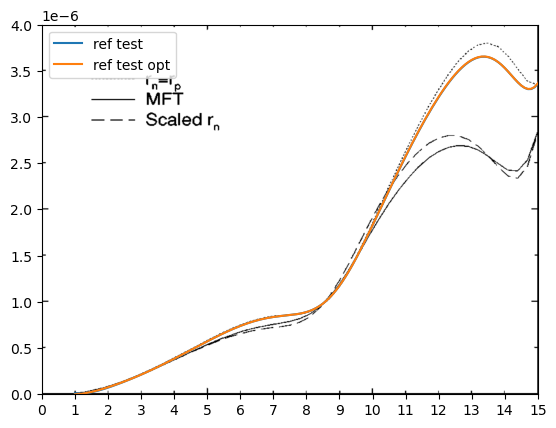

In [96]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15,0, 4e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
plt.plot(theta_deg,A_PV_ref_test_opt,label='ref test opt')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

### Compare

In [74]:
args_APV_Pb208={'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-09}

In [75]:
theta_deg=np.arange(1,50,1e-1)
E_MeV=850
print('Start')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,**args_APV_Pb208)
print('APV1 done')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,Pb208_test2,verbose=True,**args_APV_Pb208)
print('APV2 done')

Start
Calculate left crosssection ...
E= 846.2705639962488 MeV
r0= 0.0115 fm
rc= 12.6 fm
Calculate phaseshift for kappa= -1 , delta_diff=  1.045903705403628
Calculate phaseshift for kappa= -2 , delta_diff=  -1.4129033724530262
Calculate phaseshift for kappa= -3 , delta_diff=  -1.106295243497125
Calculate phaseshift for kappa= -4 , delta_diff=  -0.9076036243074457
Calculate phaseshift for kappa= -5 , delta_diff=  -0.7614301773398582
Calculate phaseshift for kappa= -6 , delta_diff=  -0.6466922637532679
Calculate phaseshift for kappa= -7 , delta_diff=  -0.5530739091010135
Calculate phaseshift for kappa= -8 , delta_diff=  -0.4747449399092414
Calculate phaseshift for kappa= -9 , delta_diff=  -0.40808250745487396
Calculate phaseshift for kappa= -10 , delta_diff=  -0.350677513687911
Calculate phaseshift for kappa= -11 , delta_diff=  -0.3008436924511315
Calculate phaseshift for kappa= -12 , delta_diff=  -0.25735188557617406
Calculate phaseshift for kappa= -13 , delta_diff=  -0.2192758184804368

(0.0, 4e-06)

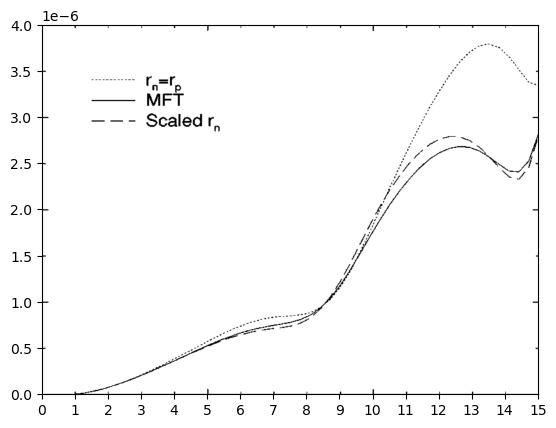

In [76]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
#plt.plot(theta_deg,A_PV1,label='1.0000')
#plt.plot(theta_deg,A_PV2,label='0.9502')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
#plt.legend()

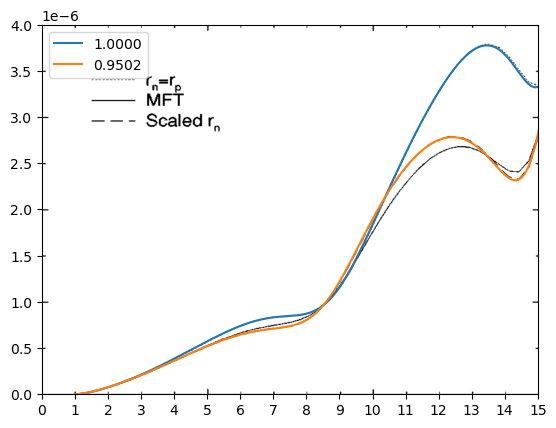

In [77]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
plt.plot(theta_deg,A_PV1,label='1.0000')
plt.plot(theta_deg,A_PV2,label='0.9502')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
plt.legend()

(0.0, 5e-05)

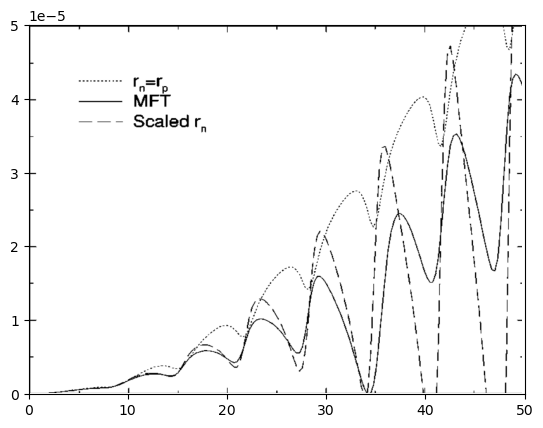

In [78]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0.1,49.6,0.02e-5, 4.98e-5],aspect='auto')
#
#
#plt.plot(theta_deg,A_PV1,label='1.0000')
#plt.plot(theta_deg,A_PV2,label='0.9502')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

(0.0, 5e-05)

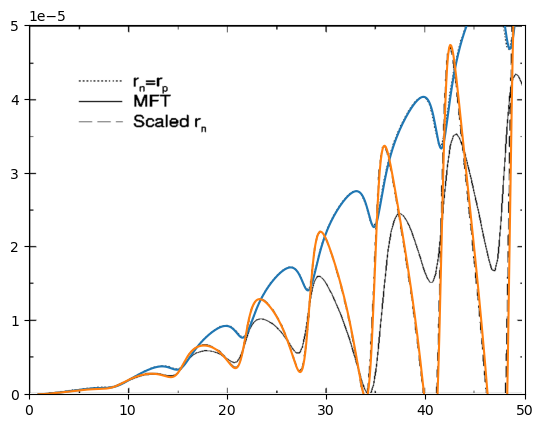

In [79]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0.1,49.6,0.02e-5, 4.98e-5],aspect='auto')
#
#
plt.plot(theta_deg,A_PV1,label='1.0000')
plt.plot(theta_deg,A_PV2,label='0.9502')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

In [52]:
theta_deg=np.arange(1,100,1e-1)
E1_MeV=502
E2_MeV=850
E3_MeV=3000
print('Start')
A_PV_502 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E1_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('502 done')
A_PV_850 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E2_MeV,theta_deg*pi/180,Pb208_test1,verbose=False,**args_APV_Pb208)
print('850 done')
A_PV_3000 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E3_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,**{'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0})
print('3000 done')
A_PV_3000_norecoil = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E3_MeV,theta_deg*pi/180,Pb208_test1,verbose=True,recoil=False,**{'method': 'DOP853', 'N_partial_waves': 250, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0})
print('3000 norecoil done')

Start
502 done
850 done
Calculate left crosssection ...
E= 2953.543357738739 MeV
r0= 0.0115 fm
rc= 12.6 fm
Calculate phaseshift for kappa= -1 , delta_diff=  0.2984158815353837
Calculate phaseshift for kappa= -2 , delta_diff=  0.9825329078222047
Calculate phaseshift for kappa= -3 , delta_diff=  1.291358413113889
Calculate phaseshift for kappa= -4 , delta_diff=  1.493150748250899
Calculate phaseshift for kappa= -5 , delta_diff=  -1.4982880828494798
Calculate phaseshift for kappa= -6 , delta_diff=  -1.378694956313805
Calculate phaseshift for kappa= -7 , delta_diff=  -1.2793526004810292
Calculate phaseshift for kappa= -8 , delta_diff=  -1.1944382035544212
Calculate phaseshift for kappa= -9 , delta_diff=  -1.1203377180005192
Calculate phaseshift for kappa= -10 , delta_diff=  -1.0546524265297013
Calculate phaseshift for kappa= -11 , delta_diff=  -0.9957081966823833
Calculate phaseshift for kappa= -12 , delta_diff=  -0.9422899799452207
Calculate phaseshift for kappa= -13 , delta_diff=  -0.893

In [55]:
q1_fm = 2*E1_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)
q2_fm = 2*E2_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)
q3_fm = 2*E3_MeV/phr.constants.hc*np.sin(theta_deg/2*pi/180)

(0.0, 3e-05)

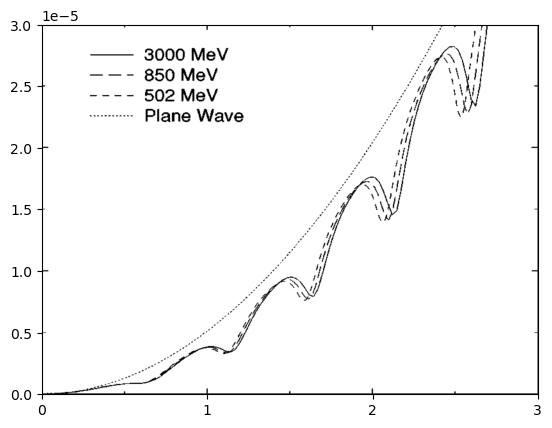

In [59]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
#plt.plot(q1_fm,A_PV_502,label='502')
#plt.plot(q2_fm,A_PV_850,label='850')
#plt.plot(q3_fm,A_PV_3000,label='3000')
#plt.plot(q3_fm,A_PV_3000_norecoil,label='3000 (no recoil)')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
#plt.legend()

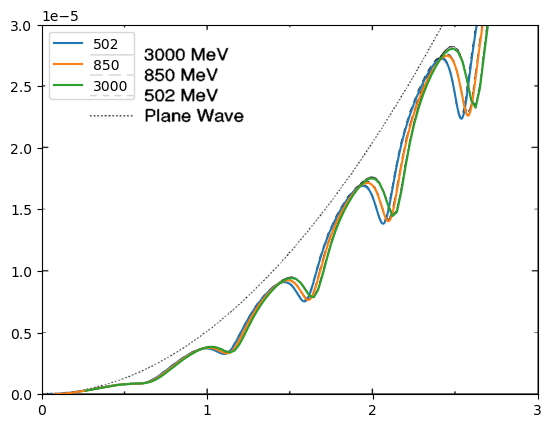

In [57]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.plot(q1_fm,A_PV_502,label='502')
plt.plot(q2_fm,A_PV_850,label='850')
plt.plot(q3_fm,A_PV_3000,label='3000')
#plt.plot(q3_fm,A_PV_3000_norecoil,label='3000 (no recoil)')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
plt.legend()

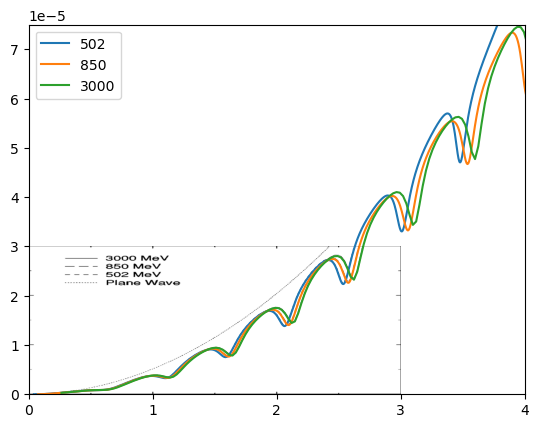

In [72]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.plot(q1_fm,A_PV_502,label='502')
plt.plot(q2_fm,A_PV_850,label='850')
plt.plot(q3_fm,A_PV_3000,label='3000')
#plt.plot(q3_fm,A_PV_3000_norecoil,label='3000 (no recoil)')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,4)
plt.ylim(0,7.5e-5)
plt.legend()

# H4

### Optimise Settings

In [97]:
He3_ref_test = phr.nuclei.references.load_reference_nucleus(2,3)
He3_ref_test.weak_density = partial(weak_density_model,lam=1.00,nucleus=He3_ref_test)
He3_ref_test.update_dependencies()

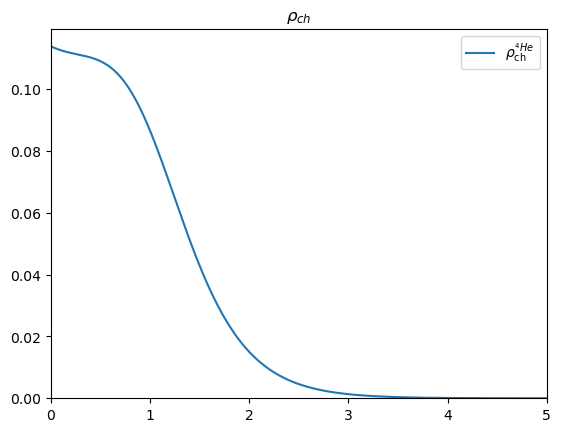

In [99]:
r=np.arange(0,5,1e-2)
plt.title(r'$\rho_{ch}$')
plt.plot(r,He4_test1.charge_density(r),label=r'$\rho^{^{4}He}_\operatorname{ch}$')
#plt.plot(r,He3_ref_test.charge_density(r),label=r'$\rho^\operatorname{ref,^{3}He}_\operatorname{ch}$')
plt.xlim(0,5)
plt.ylim(0,)
plt.legend()

In [100]:
# delta diff does not converge but only goes down to about 1e-9, a phase_difference_limit below that level will not converge

In [103]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
A_PV_ref_test = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=True,**{'method': 'DOP853', 'N_partial_waves': 50, 'atol': 1e-12, 'rtol': 1e-12, 'energy_norm': 197.3269804, 'phase_difference_limit': 0})

Calculate left crosssection ...
E= 656.2172129783868 MeV
r0= 0.0001 fm
rc= 6.4 fm
Calculate phaseshift for kappa= -1 , delta_diff=  -0.01971214953768241
Calculate phaseshift for kappa= -2 , delta_diff=  -0.009633091169598318
Calculate phaseshift for kappa= -3 , delta_diff=  -0.0050116540628102335
Calculate phaseshift for kappa= -4 , delta_diff=  -0.002594374826407453
Calculate phaseshift for kappa= -5 , delta_diff=  -0.0013209244370320228
Calculate phaseshift for kappa= -6 , delta_diff=  -0.0006617592864630595
Calculate phaseshift for kappa= -7 , delta_diff=  -0.0003270946324445134
Calculate phaseshift for kappa= -8 , delta_diff=  -0.00015989274671746045
Calculate phaseshift for kappa= -9 , delta_diff=  -7.742486548489858e-05
Calculate phaseshift for kappa= -10 , delta_diff=  -3.7179666168229986e-05
Calculate phaseshift for kappa= -11 , delta_diff=  -1.7718500335828224e-05
Calculate phaseshift for kappa= -12 , delta_diff=  -8.385165226165725e-06
Calculate phaseshift for kappa= -13 , de

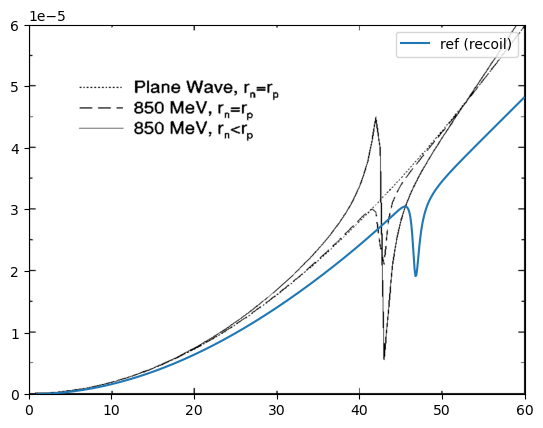

In [104]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
plt.plot(theta_deg,A_PV_ref_test,label='ref (recoil)')
#plt.plot(theta_deg,A_PV_ref_test1,label='ref 1 (no recoil)')
#plt.plot(theta_deg,A_PV_ref_test2,label='ref 2 (no recoil)')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

In [105]:
# rerun with changed minimum phase shift difference

In [106]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
args_APV_He4=phr.dirac_solvers.post_processing.crosssection.optimise_left_right_asymmetry_precision(E_MeV,theta_deg*pi/180,He4_test1,left_right_asymmetry_precision=1e-2)

new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 0.0}
time: 49.52681231498718 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-14}
time: 44.22224473953247 diff: 0.0
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-13}
time: 37.22448968887329 diff: 1.1891562820005703e-06
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-12}
time: 32.99564480781555 diff: 1.1851135882009296e-06
new best: {'method': 'DOP853', 'N_partial_waves': 120, 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-11}
time: 29.867576837539673 diff: 3.55001054254378e-06
new best: {'method': 'DOP853', 'N_partial_wave

In [107]:
#args_APV_He3={'method': 'DOP853', 'N_partial_waves': 80, 'atol': 1e-11, 'rtol': 1e-11, 'energy_norm': 0.1973269804, 'phase_difference_limit': 1e-07}

In [108]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
A_PV_ref_test_opt = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,verbose=False,**args_APV_He4)

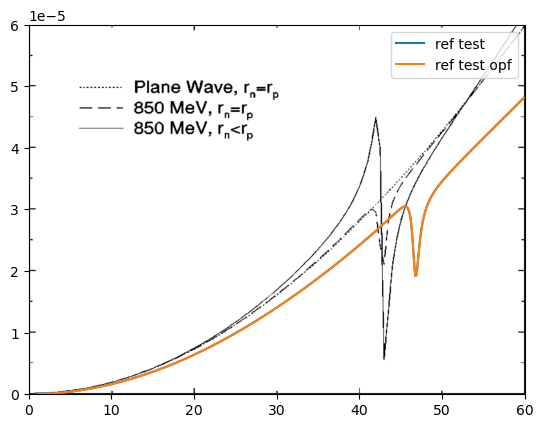

In [109]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
plt.plot(theta_deg,A_PV_ref_test,label='ref test')
plt.plot(theta_deg,A_PV_ref_test_opt,label='ref test opf')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

# tmp

In [114]:
'130i1ß3ib scalar'[-6:]
'130i1ß3ib vector'[-6:]

'vector'

In [116]:
'130i1ß3ib scalar'[:-6]
'130i1ß3ib vector'[:-6]

'130i1ß3ib '

In [145]:
import re
pat = r'args\d*$'
test = 'sakfhasiuf_args1545'
int(re.search(pat, test).group()[4:])

1545

In [157]:
re.search(pat, test) is None

True

In [161]:
su = '.txt'
path = 'fdsgdsgtr.txt'
path[:-len(su)]

'fdsgdsgtr'

In [158]:
import re
pat = r'\.\w*$'
test = 'sakfh.asiuf_args.1545.txt'
re.search(pat, test).group()

'.txt'

### Compare

In [63]:
args_APV_He4={'method': 'DOP853', 'N_partial_waves': 100, 'atol': 1e-12, 'rtol': 1e-12, 'energy_norm': 197.3269804, 'phase_difference_limit': 1e-8}

In [64]:
theta_deg=np.arange(1,60,1e-1)
E_MeV=850
print('Start')
A_PV0 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,recoil=True,verbose=False,**args_APV_He4)
print('APV0 done')
A_PV1 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test1,recoil=False,verbose=False,**args_APV_He4)
print('APV1 done')
A_PV2 = phr.dirac_solvers.post_processing.crosssection.left_right_asymmetry_lepton_nucleus_scattering(E_MeV,theta_deg*pi/180,He4_test2,recoil=False,verbose=False,**args_APV_He4)
print('APV2 done')

Start
APV0 done
APV1 done
APV2 done


(0.0, 6e-05)

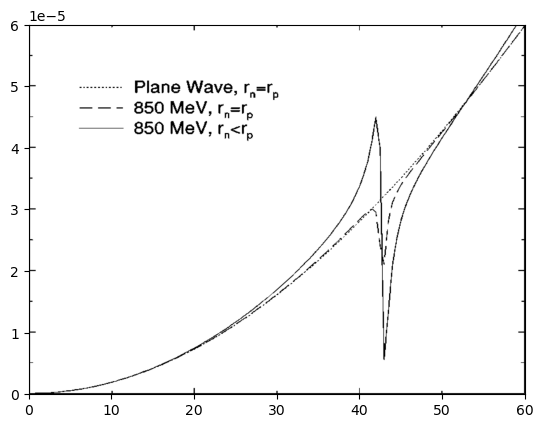

In [67]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
#plt.plot(theta_deg,A_PV0,label='1.00 (w/  recoil)')
#plt.plot(theta_deg,A_PV1,label='1.00 (w/o recoil)')
#plt.plot(theta_deg,A_PV2,label='0.99 (w/o recoil)')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
#plt.legend()

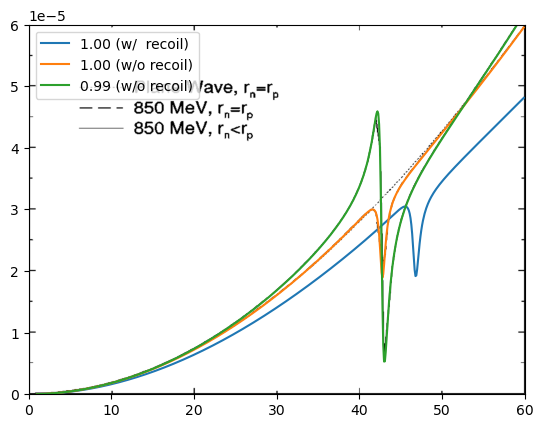

In [65]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#
plt.plot(theta_deg,A_PV0,label='1.00 (w/  recoil)')
plt.plot(theta_deg,A_PV1,label='1.00 (w/o recoil)')
plt.plot(theta_deg,A_PV2,label='0.99 (w/o recoil)')
#
#plt.xticks(np.arange(0,16,1))
plt.xlim(0,60)
plt.ylim(0,6e-5)
plt.legend()

# High partial waves Test

In [4]:
def weak_density_model(r,lam,nucleus): return (nucleus.Qw/nucleus.Z)*lam**3*nucleus.charge_density(lam*r)

In [5]:
Pb208_test1 = phr.nucleus('Pb208_test_100',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test1.weak_density = partial(weak_density_model,lam=1.00,nucleus=Pb208_test1)
Pb208_test1.update_dependencies()
Pb208_test1.fill_gaps()
Pb208_test2 = phr.nucleus('Pb208_test_095',Z=82,A=208,c=6.4,z=0.54,w=0.32)
Pb208_test2.weak_density = partial(weak_density_model,lam=0.9502,nucleus=Pb208_test2)
Pb208_test2.update_dependencies()
Pb208_test2.fill_gaps()

data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_100fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_100fermi3p_x=0.0-1000.0-1.0.txt
data loaded from  ./tmp/nucleus_splines/electric_field_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/electric_potential_Pb208_test_095fermi3p_x=0.0-20.0-0.02.txt
data loaded from  ./tmp/nucleus_splines/form_factor_Pb208_test_095fermi3p_x=0.0-1000.0-1.0.txt


In [9]:
beginning_radius_fm,electric_potential_V0,energy,mass,Z = 0.0121, -0.1291961769648503, 3000, 0, 82
#for kappa in range(-1,-200,-1):
kappa=-115
y0 = phr.dirac_solvers.base.initial_values_fm_norm(beginning_radius_fm,electric_potential_V0,energy,mass,kappa,Z)
y0

array([-1.24513523e-197,  1.00000000e-200])

In [10]:
kappa=-100
E_MeV=3000
partial_wave_kappa = phr.continuumstates(Pb208_test1,kappa,E_MeV,lepton_mass=0,verbose=True,**{'method': 'DOP853', 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 1.3269804})
partial_wave_kappa.extract_phase_shift()
print(partial_wave_kappa.phase_difference)
partial_wave_kappa.solve_IVP()

r0= 0.0121 fm
rc= 12.6 fm
y0= [-1.08342914e-47  1.00000000e-50]
g_c (unnormalized) = -2.0737014963837774e+64
f_c (unnormalized) = -2.5779308053862013e+64
A/B= 1.5370150153136277
-0.004539643932022219
y0= [-1.08342914e-47  1.00000000e-50]
g_c (unnormalized) = -1.7911160756450614e+163
f_c (unnormalized) = -2.226633541751155e+163
A/B= 1.537015015319158
 A = -1.6267764440494817e+163
 B = -1.0583998385413853e+163
norm 2.6851337555075e+163


(0.0, 15.0)

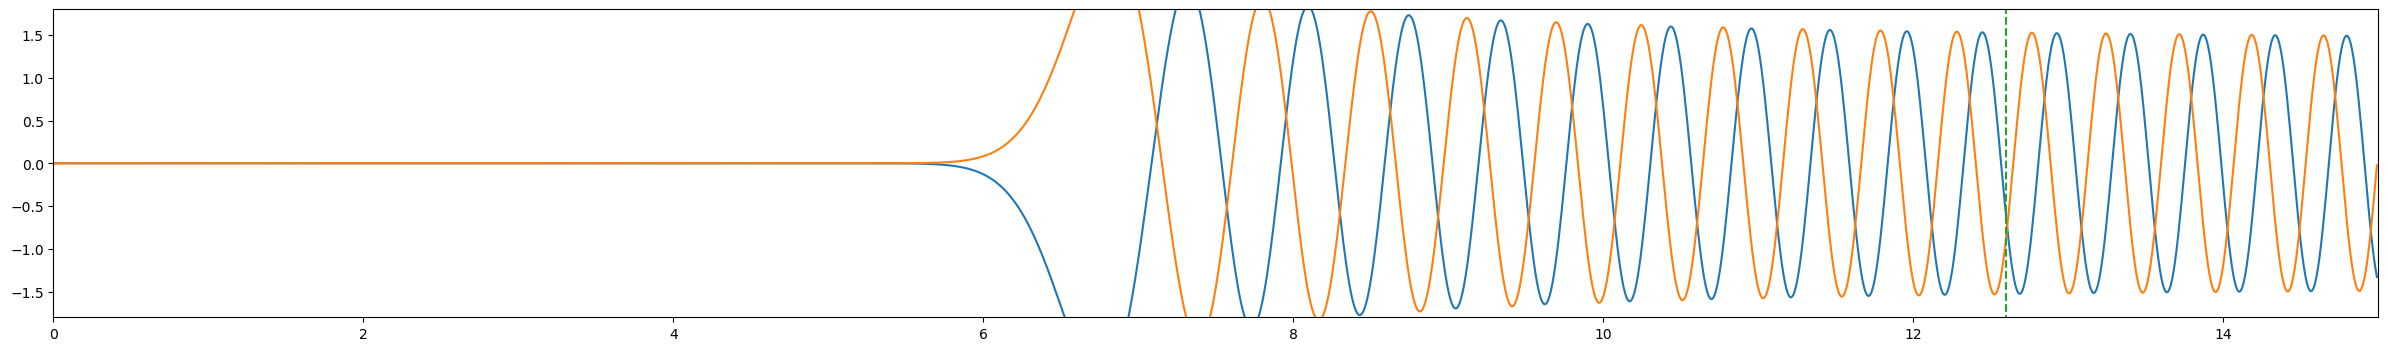

In [11]:
r=np.arange(0,15,1e-2)
plt.figure(figsize=(2*15,2*2))
plt.plot(r,partial_wave_kappa.wavefct_g(r))
plt.plot(r,partial_wave_kappa.wavefct_f(r))
plt.plot([12.6,12.6],[-2,+2],linestyle='--')
plt.ylim(-1.8,1.8)
plt.xlim(0,15)

In [22]:
kappa=-200
E_MeV=3000
partial_wave_kappa = phr.continuumstates(Pb208_test1,kappa,E_MeV,lepton_mass=0,verbose=True,**{'method': 'DOP853', 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 1.973269804})
partial_wave_kappa.extract_phase_shift()
partial_wave_kappa.phase_difference

r0= 0.0121 fm
rc= 12.6 fm
y0= [-2.16146944e-47  1.00000000e-50]
g_c (unnormalized) = -8.962348471753848e+97
f_c (unnormalized) = 6.564114852184966e+97
A/B= 13859785.464802364


-4.1548409157599053e-10

In [24]:
kappa=-500
E_MeV=3000
partial_wave_kappa = phr.continuumstates(Pb208_test1,kappa,E_MeV,lepton_mass=0,verbose=True,**{'method': 'DOP853', 'atol': 1e-13, 'rtol': 1e-13, 'energy_norm': 1.973269804})
partial_wave_kappa.extract_phase_shift()
partial_wave_kappa.phase_difference

r0= 0.0121 fm
rc= 12.6 fm
y0= [-5.39558927e-47  1.00000000e-50]
g_c (unnormalized) = -7.534608793320011e+71
f_c (unnormalized) = 1.503897995527128e+71
A/B= 7.751732453913043e+305


0.0

# pictures

(0.0, 4e-06)

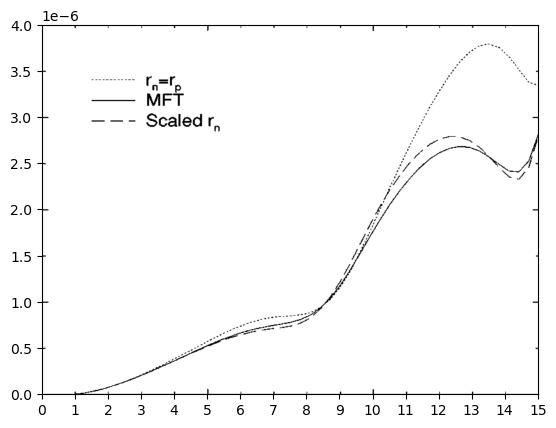

In [15]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,15.04,-0.01e-6, 3.99e-6],aspect='auto')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,15)
plt.ylim(0,4e-6)
#plt.legend()

(0.0, 5e-05)

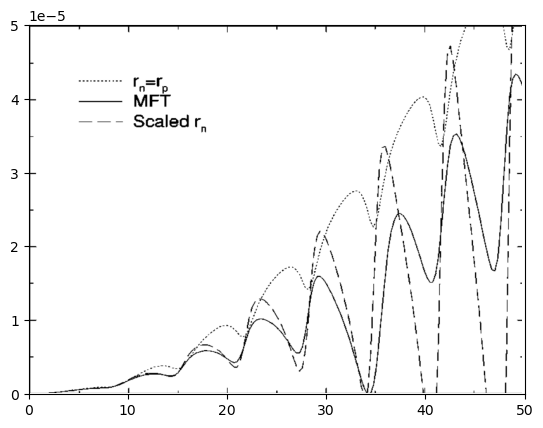

In [182]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref2.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0.1,49.6,0.02e-5, 4.98e-5],aspect='auto')
#
plt.xlim(0,50)
plt.ylim(0,5e-5)
#plt.legend()

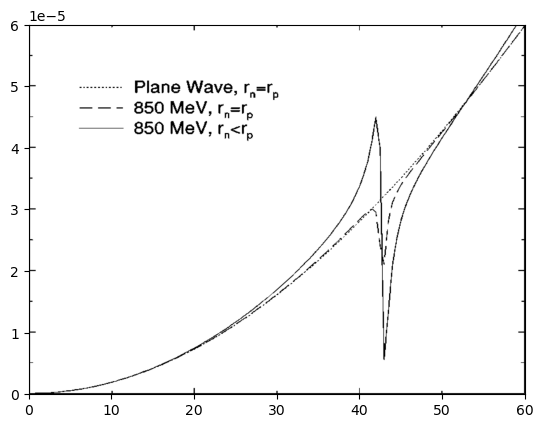

In [46]:
img = plt.imread("../data_electronscattering/He4_ACP_ref.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,60.0,0, 6e-5],aspect='auto')
#

(0.0, 3e-05)

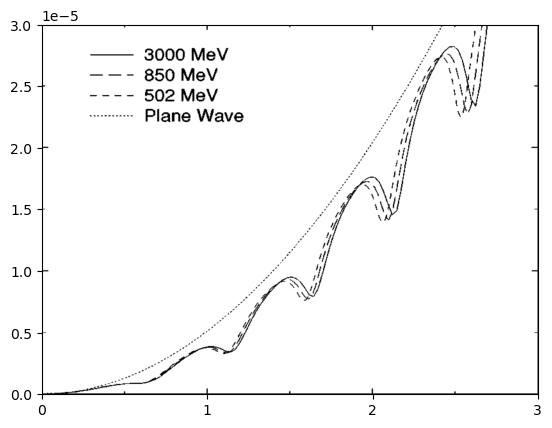

In [94]:
img = plt.imread("../data_electronscattering/Pb208_ACP_ref3.png")
#plt.figure(figsize=(10,10))
plt.imshow(img, extent=[0,3,0, 3e-5],aspect='auto')
#
plt.xticks(np.arange(0,16,1))
plt.xlim(0,3)
plt.ylim(0,3e-5)
#plt.legend()